### Kelompok: The Insomniacs

### Kelas: Data Science Batch 19A

### Nama Anggota:
    1. Vannessa Yoanita Oktorio Naibaho
    2. Shindy Atila Putri
    3. Rizki Amanda Putri
    4. Ebit Nur Alam
    5. Qonita Sungsang
    6. Ulfathea Mulyadita
    7. Muhammad Hafiz Abdul Aziz

# Health Insurance Cross Sell Prediction

Industri kendaraan bermotor di Indonesia sempat mengalami penurunan saat terjadinya pandemi pada tahun 2020. Untuk penjualan mobil, pada bulan Mei dalam sebulan hanya terjual 3,551 unit. Jumlah tersebut jauh dari rata-rata penjualan pra pandemi di kisaran 80.000-90.000 unit per bulan. Berdasarkan data Gabungan Industri Kendaraan Bermotor Indonesia (Gaikindo), penjualan mobil ritel atau penjualan dari dealer ke konsumen pada tahun 2021 melesat 49,3% menjadi 864.348 unit, atau rata-rata per bulannya terjual sekitar 70.000 unit. Sedangkan untuk penjualan motor terjual 5.057.516 unit pada tahun 2021. Jumlah tersebut meningkat kurang lebih 14% dari tahun 2020 yang hanya terjual 3.660.616 unit.

Kenaikan penjualan kendaraan bermotor tersebut dapat dipengaruhi oleh beberapa faktor, salah satunya yaitu insentif PPnBM yang disediakan oleh Pemerintah. Selain itu, berdasarkan data yang dihimpun olehh Detikoto, Rata-rata atau sebesar 80% masyarakat Indonesia membeli mobil secara kredit dan dalam proses kredit itu terdapat fasilitas asuransi. Berdasarkan data tersebut, Trusthealth (suatu perusahaan yang bergerak di bidang jasa asuransi kesehatan) berinisiatif untuk mengembangkan lini bisnis nya ke sektor asuransi kendaraan bermotor. Merujuk kepada hasil survey yang dilakukan oleh Bank Mandiri, terdapat kemungkinan kenaikan penjualan bermotor senilai 8,2% di tahun 2022. Kabar ini menjadi suatu angin segar bagi perusahaan, dengan masuk ke sektor ini perusahaan berpotensi mendapatkan tambahan revenue baru senilai $31.250 per tahunnya. 
 
Trust Health adalah sebuah perusahaan yang bergerak di layanan asuransi kesehatan. Seiring dengan naiknya penjualan kendaraan bermotor, Trust Health berencana untuk mengembangkan lini bisnis nya untuk masuk juga ke sektor asuransi kendaraan bermotor. Cara termudah mendapatkan customer untuk lini bisnis baru tersebut adalah dengan mengajak existing customer saat ini untuk turut menggunakan jasa asuransi kendaraan bermotor. Hal ini bertujuan untuk mempermudah tim sales dalam mengakuisisi customer baru, sehingga perlu diprediksi customer existing mana saja yang akan tertarik untuk mendaftar asuransi kendaraan.

### Description about the data:

1.	Driving_License	: 1: Customer already has DL, 0: Customer does not have Driving License.
2.	Previously_Insured : 1: Customer already has Vehicle Insurance, 0: Customer doesn’t have Vehicle Insurance.
3.	Vehicle_Age	: Age of the Vehicle.
4.	Vehicle_Damage : 1: Customer got his/her vehicle damaged in the past. 0: Customer didn’t get his/her vehicle damaged in the past.
5.	Response : 1: Customer is interested, 0: Customer isn’t interested.

### Additional description:

1.	Id : Unique ID for the customer.
2.	Gender : Gender of the customer; male and female.
3.	Age	: Age of the customer.
4.	Region_Code	: Unique code for the region of the customer.
5.	Annual_Premium : The amount customer needs to pay as premium in the year.
6.	PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
7.  Vintage : Total berapa lama user bergabung menjadi customer perusahaan dalam satuan hari.

In [1]:
## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as sp
import numpy as np

In [2]:
data = pd.read_csv('train_hi.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1. Descriptive Statistics

## Kesesuaian Tipe Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
data.shape

(381109, 12)

#### Semua tipe data setiap kolom sudah sesuai

## Cek Missing Values

In [5]:
print("Kolom yang memiliki missing value adalah :")
data.columns[data.isnull().any()].tolist()

Kolom yang memiliki missing value adalah :


[]

#### Tidak ada kolom yang memiliki missing values

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Data Numerik dan Kategori

In [7]:
numerical = ['Age', 'Annual_Premium', 'Vintage']
categorical = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
categorical_int = ['Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Response']

In [8]:
data[numerical].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [9]:
data[categorical].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [10]:
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [11]:
data['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [12]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [13]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [14]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [15]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [16]:
data['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [17]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Interpretasi:

Berdasarkan data di atas,

- Semua tipe data setiap kolom sudah sesuai
- Tidak ada kolom yang memiliki missing values
- Terdapat data numerical yang berbeda jauh antara nilai min/max dengan mean nya yaitu `Age`, `Annual_Premium` dan `Vintage`.

    - Untuk data Age, nilai min = 20.00, max = 85.00 dan mean = 38.82.
    - Untuk data Annual_Premium, nilai min = 2630.00, max = 540165.00, dan mean = 30564.38
    - Untuk data Vintage, nilai min = 10.00, max = 299.00, dan mean = 154.34
    
   Sedangkan untuk data categorical, data dengan frekuensi yang timpang adalah `Vehicle_Age`, yaitu `1-2 Year` sebanyak `200316` dengan `2 Years` sebanyak      `16007`
   Pada categorical_int, juga terdapat data dengan frekuensi yang timpang : `Region_Code` dengan kode `28` dan `Policy_Sales_Channel` dengan kode `152.0`
- Target output: response

### Kesimpulan:

- Semua tipe data pada kolom sudah sesuai dan tidak terdapat missing values sehingga tidak berlu diubah
- Terdapat beberapa kolom yang diduga ada keanehan timpang sehingga perlu diolah terlebih dahulu atau tidak digunakan
- Target output dari project ini adalah memprediksi respons user apakah tertarik atau tidak untuk mendaftar asuransi kendaraan

# Exploratory Data Analysis

## 2. Univariate Analysis

In [18]:
asurance = pd.read_csv('train_hi.csv')
asurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [19]:
numericals = ['Age', 'Annual_Premium', 'Vintage']
categoricals = ['Gender', 'Vehicle_Damage', 'Region_Code', 'Policy_Sales_Channel', 'Vehicle_Age', 'Driving_License', 'Previously_Insured', 'Response']

# Individuals Boxplots (Numericals)

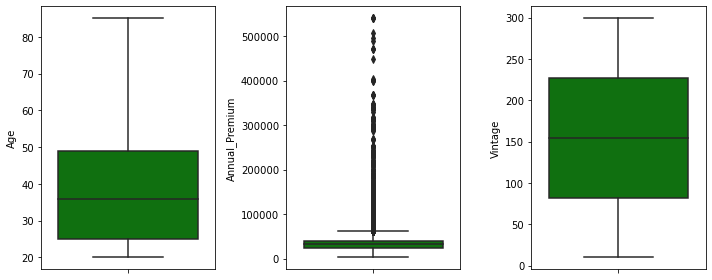

In [20]:
features = numericals
plt.figure(figsize=(10, 4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=asurance[features[i]], color='green', orient ='v')
    plt.tight_layout()

# Individual Distplot (Numericals)

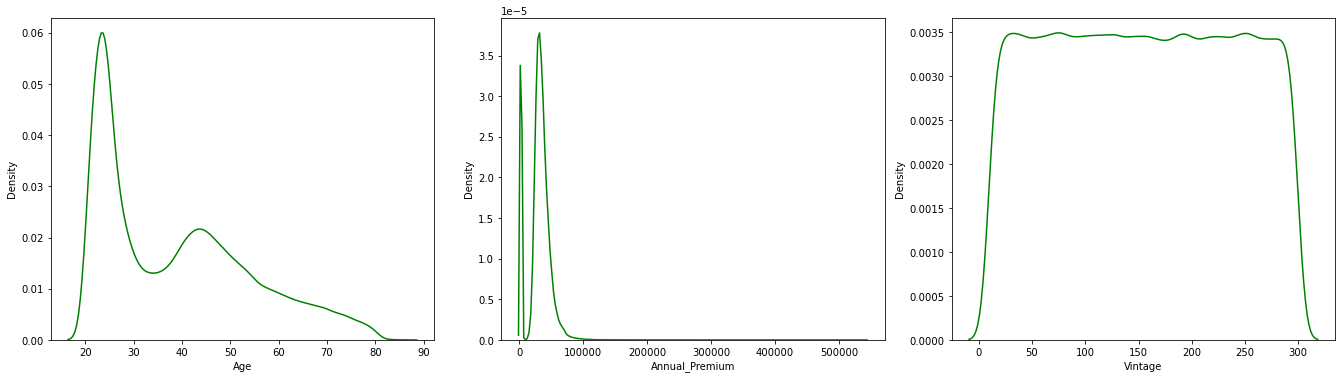

In [21]:
features = numericals
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=asurance[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

#  Countplot Categorical

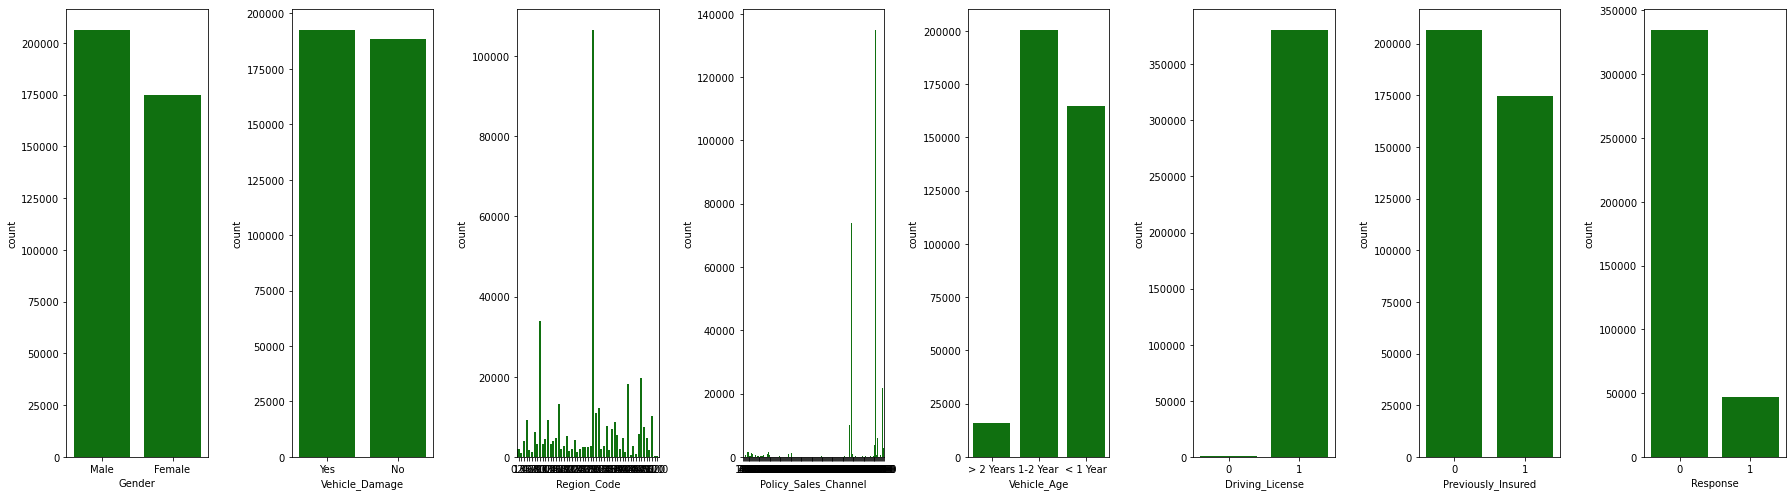

In [22]:
features = categoricals
plt.figure(figsize=(25, 7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=asurance[features[i]], color='green')
    plt.tight_layout()

# Hasil Observasi

1) Terdapat outlier pada varibel Annual_Premium.

2) Secara visualisasi tidak ada data yang berdistribusi normal.

3) Variabel Age memiliki positively skewed

4) Variabel vintage berdistribusi uniform 

5) Variabel annual_premium berdistribusi bimodal

6) Berdasarkan countplot categorical, untuk distribusi response mayoritas customer merespon tidak tertarik (0). pada variabel umur kendaraan (Vehicle_Age) mayoritas < 1 tahun dan 1-2 tahun. kemudian mayoritas customer memiliki surat ijin mengemudi (Driving_License). untuk variabel Vehicle_Age dan Driving_License, perlu diperhatikan dalam langkah selanjutnya karena datanya imbalance

# Solusi

1) Proses selanjutnya perlu dilakukan transformasi agar data nya berdistribusi  normal.

2) Penghapusan data outlier

## 3. Multivariate Analysis

In [23]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 1 
data.loc[data['Gender'] == 'Female', 'Gender'] = 0

data.loc[data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2 
data.loc[data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1 
data.loc[data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0 

data.loc[data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1 
data.loc[data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [24]:
for col in data.columns:
    data[col] = data[col].astype(np.int32)

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


<AxesSubplot:>

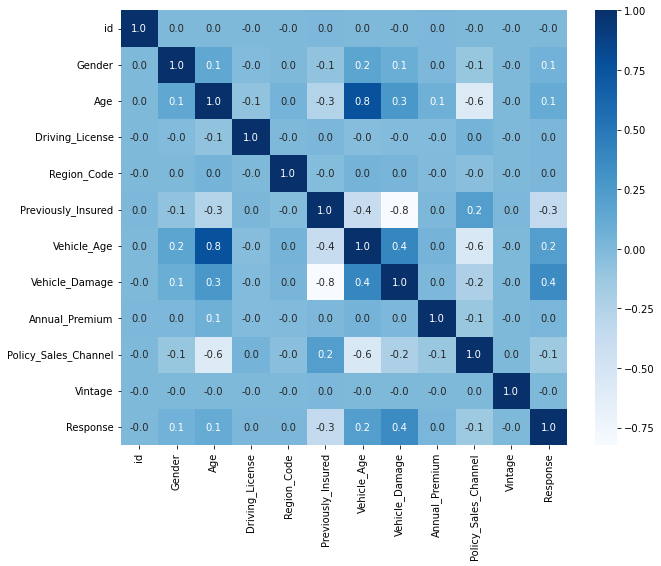

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.1f')

**Hasil Observasi untuk point A**

Berdasarkan heatmap chart diatas, terdapat beberapa feature yang memiliki korelasi dengan label yaitu feature previously_insured, vehicle damage dan policy_sales_channel dimana keterkaitan antara feature dengan label dijabarkan dalam pemaparan beriikut:

1) Ada kaitan yang cukup kuat antara feature previously_insured dengan label. Dimana semakin besar nilai previously_insured maka semakin kecil pula nilai label nya. Sehingga feature ini tetap perlu dipertahankan.

2) Feature vehicle damage memiliki kaitan yang lumayan kuat dengan label. Dimana feature ini memiliki nilai korelasi sebesar 0.4 (mendekati 0.7). Feature ini dapat dipertahankan untuk pembuatan model.

3) Feature policy_sales_channel memiliki korelasi dengan label. Walaupun nilai korelasi anntara feature dengan label ini tidak sebesar feature lainnya. Namun feature ini dapat tetap dipertahankan karena in real life, sales channel dapat mempengaruhi keputusan nasabah untuk tergabung dengan program baru yang ditawarkan.

**Hasil Observasi Point B**

1) Terdapat korelasi yang cukup kuat antara featured previoulsy insured dengan feature vehicle damage dengan nilai -0.8. Nilai korelasi dari 2 feature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai previously insured nya maka semakin kecil nilai vehicle damage.

2) Terdapat korelasi yang cukup kuat antara featured policy_sales_channel dengan feature age dengan nilai -0.6. Nilai korelasi dari 2 feature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai policy_sales_channel nya maka semakin kecil nilai age nya.

3) Terdapat korelasi yang cukup kuat antara featured vehicle_age dengan featured policy_sales_channel dengan nilai -0.6. Nilai korelasi dari 2 feature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai vehicle_age nya maka semakin kecil nilai policy_sales_channel nya.

4) Terdapat korelasi yang cukup kuat antara featured response dengan featured previously_insured dengan nilai -0.3. Nilai korelasi dari 2 feature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai response nya maka semakin kecil nilai previously_insured nya.

5) Terdapat korelasi yang lemah antara featured vehicle_age dengan featured previously_insured dengan nilai -0.4. Nilai korelasi dari 2 feaature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai vehicle_age nya maka semakin kecil nilai previously_insured nya.

6) Terdapat korelasi yang lemah antara featured previously_insured dengan featured age dengan nilai -0.3. Nilai korelasi dari 2 feature ini tidak searah (berbanding terbalik) yang mana semakin besar / banyak nilai previously_insured nya maka semakin kecil nilai age nya.

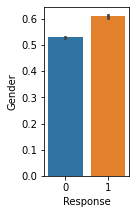

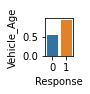

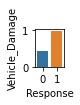

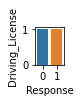

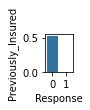

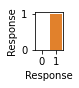

In [26]:
plt.figure(figsize=(18,18))
numerical = ['Age', 'Annual_Premium', 'Vintage']
categorical = ['Gender', 'Vehicle_Age', 'Vehicle_Damage','Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Response']

categorical.remove('Region_Code')
categorical.remove('Policy_Sales_Channel')
features = categorical
for i in range(0, len(features)):
    plt.subplot(5, 10, i+1) 
    sns.barplot(data=data, x='Response', y=features[i])
    plt.show()

# 4. Analisa, Visualisasi, dan Insight

## Gender

In [27]:
fs = pd.read_csv('train_hi.csv')
fs.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
fs = fs.replace({'Response': {1 : 'yes', 0 : 'no'}})
fs.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,yes
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,no
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,yes
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,no
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,no


In [29]:
gen = fs.groupby(['Gender', 'Response'])['id'].nunique().reset_index()
gen

,Gender,Response,id
0,Female,no,156835
1,Female,yes,18185
2,Male,no,177564
3,Male,yes,28525


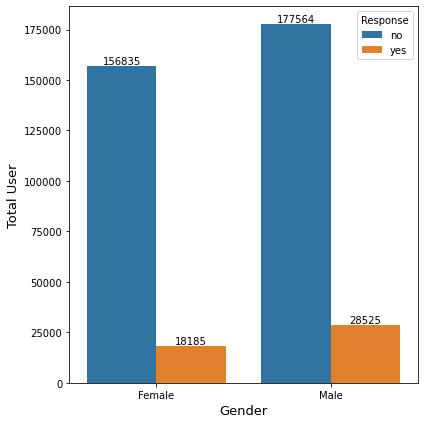

In [30]:
x = gen['Gender']
y = gen['id']

plt.figure(figsize=(6,6))
gender = sns.barplot(x=x, y=y, data=gen,
           hue='Response')

plt.ylabel('Total User', fontsize=13) 
plt.xlabel('Gender', fontsize=13)

for i in gender.containers:
    gender.bar_label(i,)

plt.tight_layout()

Grafik diatas menunjukkan bahwa lebih dari 300.000 pengguna yang terdiri dari laki-laki dan perempuan tidak tertarik untuk menggunakan produk asuransi kendaraan, hanya sekitar 10% dari total keseluruhan pengguna yang memiliki ketertarikan untuk menggunakan produk asuransi kendaraan. Sehingga, dapat ditarik kesimpulan bahwa tidak ada pengaruh yang signifikan jika produk asuransi ditawarkan berdasarkan gender dari pengguna.

## Age

In [31]:
asurance = pd.read_csv('train_hi.csv')
asurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

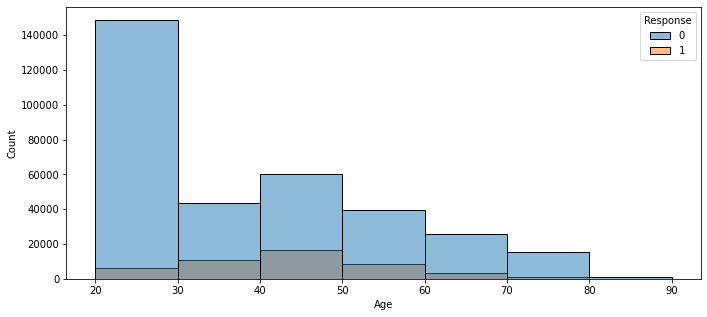

In [32]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
sns.histplot(data=asurance, x='Age', hue='Response', binwidth=10)

Grafik diatas menunjukkan bahwa rentang usia 40 tahun sampai 50 tahun memiliki ketertarikan yang lebih tinggi untuk menggunakan  jasa asuransi kendaraan sedangkan customer pada rentang usia 20 tahun sampai 30 tahun cenderung tidak tertarik menggunakan jasa asuransi kendaraan. Dari data tersebut dapat diambil kesimpulan untuk lebih memfokuskan promosi asuransi kendaraan kepada customer dengan rentang usia 40 tahun sampai 50 tahun.


## Driving Licence

In [33]:
DL = data.copy()

In [34]:
DL_group = DL.groupby(['Driving_License', 'Response'])['id'].nunique().reset_index()
DL_group

,Driving_License,Response,id
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


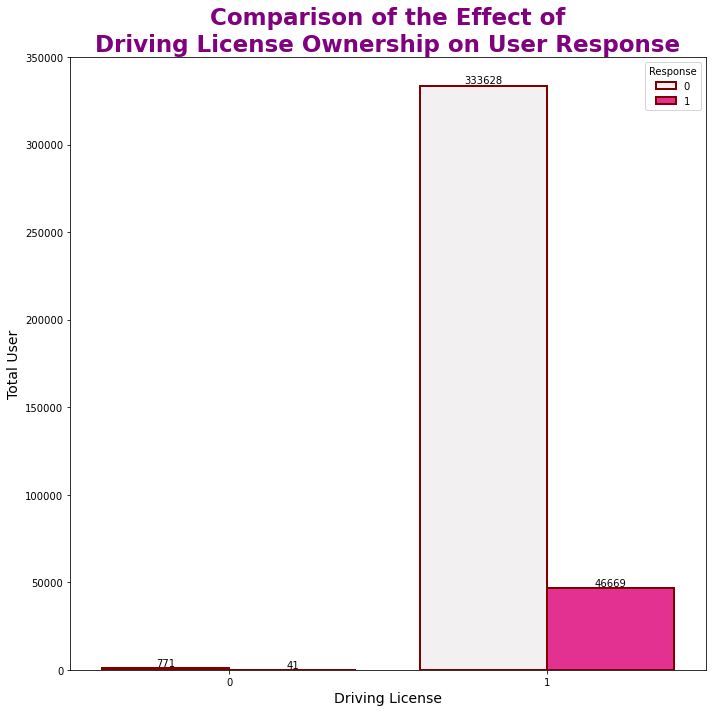

In [35]:
x = DL_group['Driving_License']
y = DL_group['id']

plt.figure(figsize=(10,10))
g = sns.barplot(x=x, y=y, data=DL_group, 
                hue='Response', 
                color='deeppink',
                edgecolor= 'maroon', 
                linewidth = 2)

plt.title('Comparison of the Effect of\nDriving License Ownership on User Response', 
          color='purple', 
          loc='center',
          fontsize=23,
          fontweight='bold')
plt.xlabel('Driving License', fontsize=14)
plt.ylabel('Total User', fontsize=14)

for i in g.containers:
    g.bar_label(i,)

plt.ylim(0, 350000)
plt.tight_layout()

### Interpretasi:

Berdasarkan grafik dapat dilihat bahwa banyak konsumen yang memiliki Driving License namun belum tertarik untuk mengambil Asuransi Kendaraan.

### Business Insight:

Konsumen yang sudah memiliki Driving License dapat didorong dengan memberikan informasi keuntungan memiliki Asuransi Kendaraan atau promosi asuransi.

## Previously Insured

In [36]:
p = data.copy()

In [37]:
p_group = p.groupby(['Previously_Insured','Response'])['id'].nunique().reset_index()
p_group

,Previously_Insured,Response,id
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


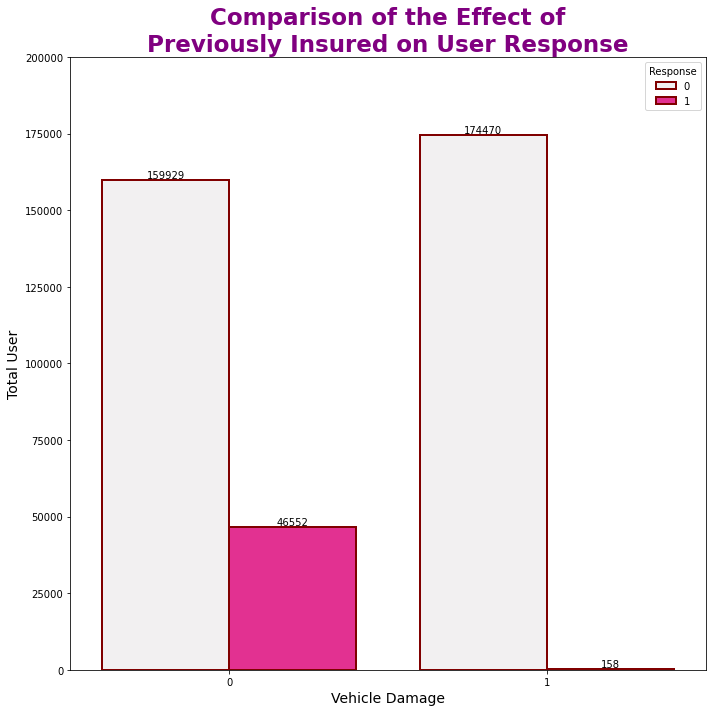

In [38]:
x = p_group['Previously_Insured']
y = p_group['id']

plt.figure(figsize=(10,10))
g = sns.barplot(x=x, y=y, data=p_group, 
                hue='Response', 
                color='deeppink',
                edgecolor= 'maroon', 
                linewidth = 2)

plt.title('Comparison of the Effect of\nPreviously Insured on User Response', 
          color='purple', 
          loc='center',
          fontsize=23,
          fontweight='bold')
plt.xlabel('Vehicle Damage', fontsize=14)
plt.ylabel('Total User', fontsize=14)

for i in g.containers:
    g.bar_label(i,)

plt.ylim(0, 200000)
plt.tight_layout()

berdasarkan plot diatas mayoritas customer yang pernah mengasuransikan kendaraannya merespon tidak tertarik (0) ketika ditawarkan asuransi kendaraan. 
kemudian untuk customer yang tertarik (1) dengan asuransi kendaraan pun mayoritas merupakan customer yang sebelumnya belum pernah mengasuransikan kendaraannya. 

secara bisnis kita dapat menggali informasi lebih dalam melalui customer yang pernah mengasuransikan kendaraannya namun tidak tertarik ketika ditawarkan kembali, kita dapat menggali faktor apa saja yang menyebabkan customer tidak tertarik lagi. apakah dari proses claimmnya yang tidak memuaskan? atau cakupan manfaatnya kurang sesuai?. kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

## Vehicle Age

C:\Users\Hafiz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


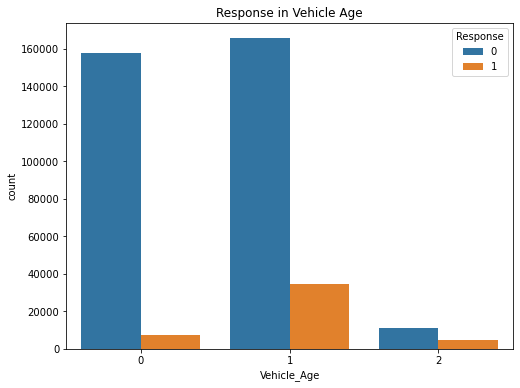

In [39]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data['Vehicle_Age'], hue = data['Response'])
plt.title("Response in Vehicle Age")
plt.show()

**Interpretasi**

Dari data diatas menunjukkan perbandingan data customer yang seimbang berada pada vVehicle Age yang nomor 2, bisa diperkirakan 50:50.

**Business Insight**

Pihak asuransi dapat menambah jumlah kendaraan yang baru untuk meningkatkan ketertarikan masyarakat untuk berlangganan asuransi kendaraan. Dengan menggunakan kendaraan yang baru dapat menurunkan tingkat kerusakan kendaraan dan masyarakat juga merasa aman dalam menggunakan kendaraan tersebut.

## Vehicle Damage

In [40]:
z= data.copy()

In [41]:
z_group = z.groupby(['Vehicle_Damage','Response'])['id'].nunique().reset_index()
z_group

,Vehicle_Damage,Response,id
0,0,0,187714
1,0,1,982
2,1,0,146685
3,1,1,45728


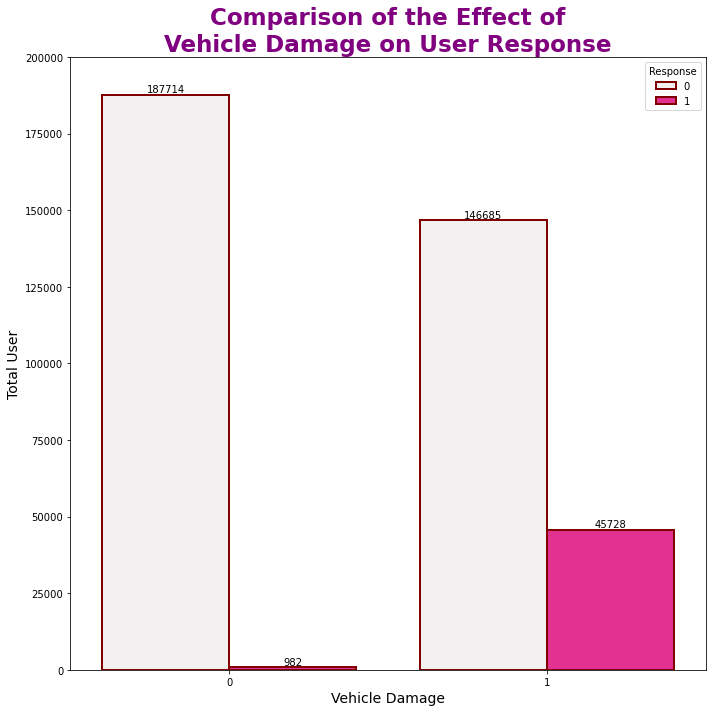

In [42]:
x = z_group['Vehicle_Damage']
y = z_group['id']

plt.figure(figsize=(10,10))
g = sns.barplot(x=x, y=y, data=z_group, 
                hue='Response', 
                color='deeppink',
                edgecolor= 'maroon', 
                linewidth = 2)

plt.title('Comparison of the Effect of\nVehicle Damage on User Response', 
          color='purple', 
          loc='center',
          fontsize=23,
          fontweight='bold')
plt.xlabel('Vehicle Damage', fontsize=14)
plt.ylabel('Total User', fontsize=14)

for i in g.containers:
    g.bar_label(i,)

plt.ylim(0, 200000)
plt.tight_layout()

### Perbandingan Respon User Berdasarkan Ada atau Tidaknya Kerusakan Kendaraan

### Interpretasi:

Berdasarkan grafik di atas dapat diketahui bahwa total user yang kendaraannya sudah pernah mengalami kerusakan, memberi respon tertarik (1) lebih banyak dibandingkan dengan user yang kendaraannya tidak terdapat kerusakan. Jika dibandingkan, total user dengan respon tidak tertarik (0) dengan kendaraan yang tidak mengalami kerusakan lebih banyak dibandingkan dengan yang mengalami kerusakan.

Hal ini bisa disebabkan karena user dengan kendaraan yang sudah mengalami kerusakan lebih aware dibandingkan yang belum mengalami kerusakan, sehingga katertarikannya lebih tinggi. Hal ini bisa dioptimalkan dengan memberikan informasi mengenai pentingnya mengasuransikan kendaraan ataupun meningkatkan promosi, sehingga user yang tidak tertarik bisa lebih yakin dan mau mendaftar asuransi kendaraan.

### Insight

Bisnis: keadaan ini bisa dioptimalkan dengan memberikan informasi mengenai pentingnya mengasuransikan kendaraan ataupun meningkatkan promosi, sehingga user yang tidak tertarik bisa lebih yakin dan mau mendaftar asuransi kendaraan.

## Annual Premium

In [43]:
AP = data.copy()

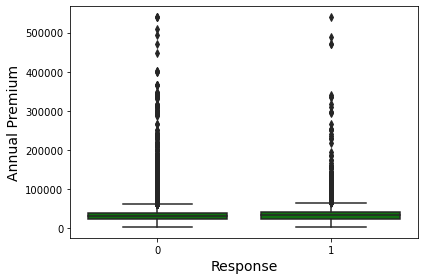

In [47]:
sns.boxplot(data=AP, x='Response', y='Annual_Premium', color='green')
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.tight_layout()

### Interpretasi

Berdasarkan grafik di atas dapat dilihat bahwa Annual Premium tidak berpengaruh terhadap Response konsumen karena jumlah Response Yes dan No terhadap Annual Premium berimbang.

### Business Insight

Berdasarkan interpretasi dan grafik maka dapat disimpulkan bahwa Annual Premium tidak dapat dijadikan sebagai faktor untuk menarik konsumen mengambil asuransi kendaraan

## Vintage

(0.0, 6000.0)

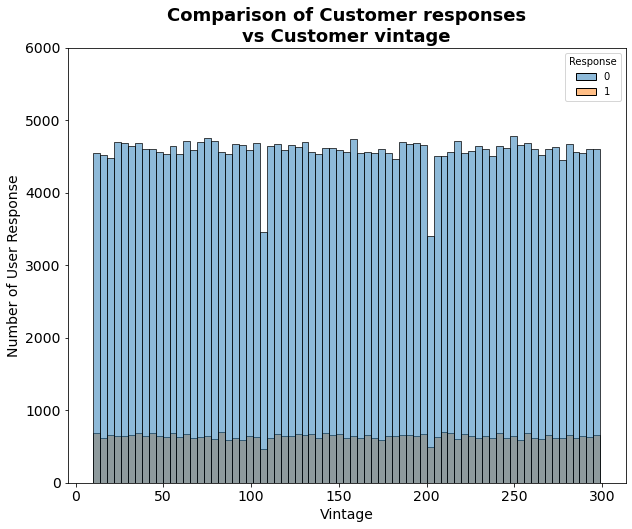

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(x='Vintage', hue='Response', data=data)

plt.title("Comparison of Customer responses\nvs Customer vintage",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Number of User Response', fontsize=14) # y axis label
plt.xlabel('Vintage', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,6000)

**Business Insight**

Grafik histogram diatas menunjukan distribusi persebaran customer vintage terhadap user response.  Berdasarkan grafik tersebut, dapat ditarik kesimpulan bahwa lama masa langganan customer (vintage) tidak mengindikasikan ketertarikan customer untuk ikut serta berlangganan jasa layanan asuransi kendaraan bermotor. Hal ini bisa disimpulkan juga bahwa vintage tidak bisa digunakan sebagai salah satu variable untuk approaching customer agar tertarik menggunakan layanan jasa asuransi kendaraan bermotor yang disediakan oleh perusahaan.

## Response

In [49]:
yes = p[p['Response'] == 1]

In [50]:
yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46710 entries, 0 to 381097
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    46710 non-null  int32
 1   Gender                46710 non-null  int32
 2   Age                   46710 non-null  int32
 3   Driving_License       46710 non-null  int32
 4   Region_Code           46710 non-null  int32
 5   Previously_Insured    46710 non-null  int32
 6   Vehicle_Age           46710 non-null  int32
 7   Vehicle_Damage        46710 non-null  int32
 8   Annual_Premium        46710 non-null  int32
 9   Policy_Sales_Channel  46710 non-null  int32
 10  Vintage               46710 non-null  int32
 11  Response              46710 non-null  int32
dtypes: int32(12)
memory usage: 2.5 MB


In [51]:
yes_nums = ['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
yes_cats = ['Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Previously_Insured']

In [52]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

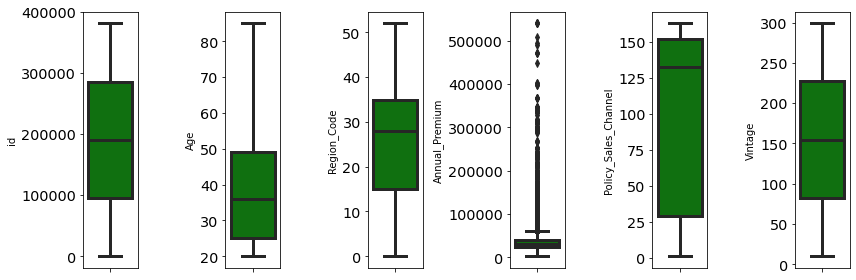

In [56]:
features = yes_nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=p[features[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Hafiz\AppData\Local\Temp/ipykernel_10112/754702108.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(yes_nums)/2, i+1)
C:\Users\Hafiz\AppData\Local\Temp/ipykernel_10112/754702108.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(yes_nums)/2, i+1)
C:\Users\Hafiz\AppData\Local\Temp/ipykernel_10112/754702108.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(yes_nums)/2, i+1)
C:\Users\Hafiz\AppData\Local\Temp/ipykernel_10112/754702108.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed t

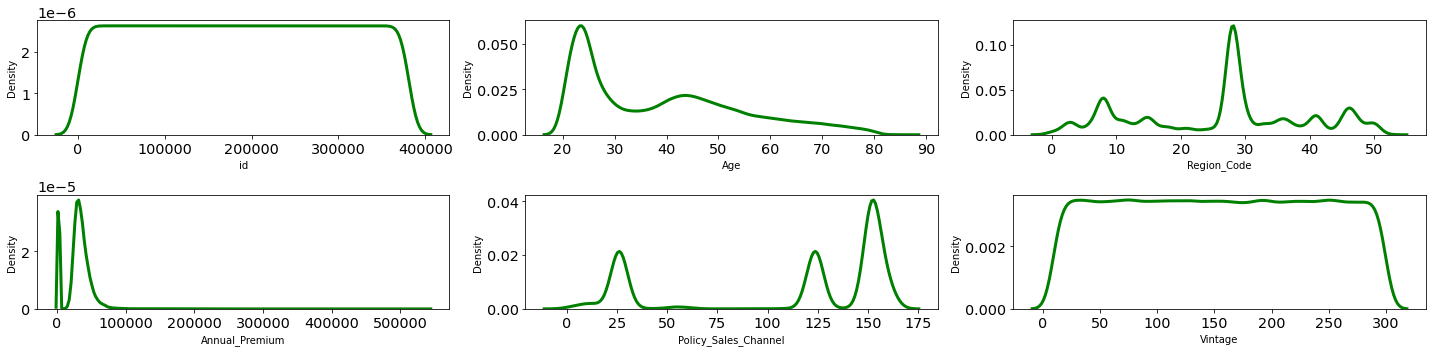

In [55]:
features = yes_nums
plt.figure(figsize=(20, 5))
for i in range(0, len(yes_nums)):
    plt.subplot(2, len(yes_nums)/2, i+1)
    sns.kdeplot(x=p[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

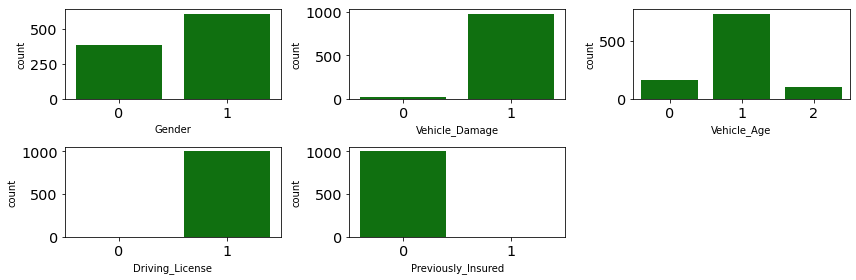

In [57]:
df_sample = yes.sample(1000, random_state=1000)
for i in range(0, len(yes_cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[yes_cats[i]], color='green', orient='v')
    plt.tight_layout()

dari total 381109 customer terdapat 46710 customer yang tertarik dengan asuransi kendaraan. mayoritas customer yang tertarik adalah pria, kendaraannya pernah mengalami kerusakan, kemudian mayoritas umur kendaraannya 1-2 tahun dan sebelumnya belum pernah diasuransikan.

dengan mengetahui karakteristik customer yang tertarik terhadap asuransi kendaraan (0), kita dapat memprioritaskan target marketing kepada customer-customer dengan karakteristiknya yang sama.